###  Objective
The main objective here is to score clients so we know who to email . We will evaluate our models using ROC curve and AUC.

In [56]:
from fastai.imports import *
os. listdir('../input/')

['caravan-insurance-challenge.csv']

In [57]:
df = pd.read_csv('../input/caravan-insurance-challenge.csv')
original = df.copy()
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


adding the real labels :
(sorry for the messy cell will be the only one i promise :p )

In [58]:
labels = ['ORIGIN', 'CustomerSubtype', 'NumberOfHouses1', 'AvgSizeHousehold1', 'AvgAge', 'CustomerMainType', 'RomanCatholic', 'Protestant...', 'OtherReligion', 'NoReligion', 'Married', 'LivingTogether', 'OtherRelation', 'Singles', 'HouseholdWithoutChildren', 'HouseholdWithChildren', 'HighLevelEducation', 'MediumLevelEducation', 'LowerLevelEducation', 'HighStatus', 'Entrepreneur', 'Farmer', 'MiddleManagement', 'SkilledLabourers', 'UnskilledLabourers', 'SocialClassA', 'SocialClassB1', 'SocialClassB2', 'SocialClassC', 'SocialClassD', 'RentedHouse', 'HomeOwners', '1Car', '2Cars', 'NoCar', 'NationalHealthService', 'PrivateHealthInsurance', 'Income<30.000', 'Income30-45.000', 'Income45-75.000', 'Income75-122.000', 'Income>123.000', 'AverageIncome', 'PurchasingPowerClass', 'ContributionPrivateThirdPartyInsurance', 'ContributionThirdPartyInsurance(firms)...', 'ContributionThirdPartyInsurane(agriculture)', 'ContributionCarPolicies', 'ContributionDeliveryVanPolicies', 'ContributionMotorcycle/scooterPolicies', 'ContributionLorryPolicies', 'ContributionTrailerPolicies', 'ContributionTractorPolicies', 'ContributionAgriculturalMachinesPolicies', 'ContributionMopedPolicies', 'ContributionLifeInsurances', 'ContributionPrivateAccidentInsurancePolicies', 'ContributionFamilyAccidentsInsurancePolicies', 'ContributionDisabilityInsurancePolicies', 'ContributionFirePolicies', 'ContributionSurfboardPolicies', 'ContributionBoatPolicies', 'ContributionBicyclePolicies', 'ContributionPropertyInsurancePolicies', 'ContributionSocialSecurityInsurancePolicies', 'NumberOfPrivateThirdPartyInsurance1-12', 'NumberOfThirdPartyInsurance(firms)...', 'NumberOfThirdPartyInsurane(agriculture)', 'NumberOfCarPolicies', 'NumberOfDeliveryVanPolicies', 'NumberOfMotorcycle/scooterPolicies', 'NumberOfLorryPolicies', 'NumberOfTrailerPolicies', 'NumberOfTractorPolicies', 'NumberOfAgriculturalMachinesPolicies', 'NumberOfMopedPolicies', 'NumberOfLifeInsurances', 'NumberOfPrivateAccidentInsurancePolicies', 'NumberOfFamilyAccidentsInsurancePolicies', 'NumberOfDisabilityInsurancePolicies', 'NumberOfFirePolicies', 'NumberOfSurfboardPolicies', 'NumberOfBoatPolicies', 'NumberOfBicyclePolicies', 'NumberOfPropertyInsurancePolicies', 'NumberOfSocialSecurityInsurancePolicies', 'CARAVAN']

## Data preparation

In [59]:
df.columns = labels
df.shape

(9822, 87)

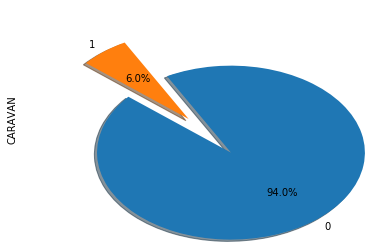

In [60]:
df.CARAVAN.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140,explode=(0.5, 0))

### Conclusion:

   - It's a dataset with 9822 observations.
   - The dataset is without null values and outliers
   - The dataset is imbalanced as Yes answer represent only 6%


In [61]:
yes = df[df.CARAVAN == 1].copy()

### Customer Sub Type

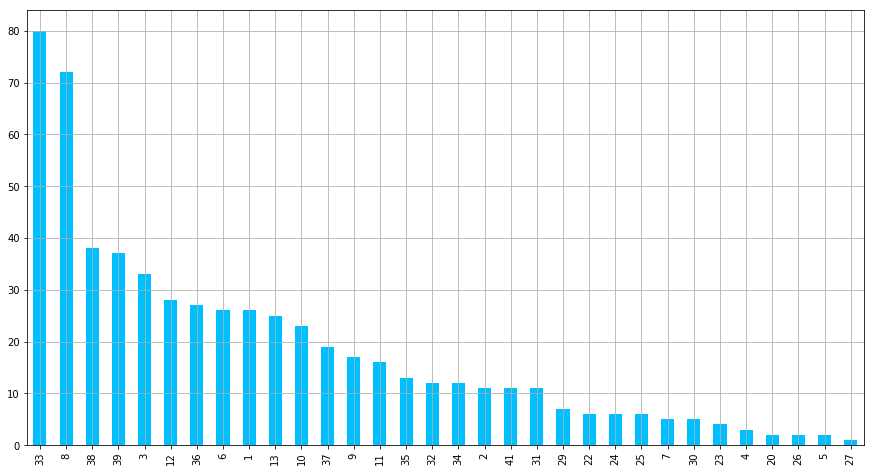

In [62]:
plt.figure(figsize=(15,8))
yes['CustomerSubtype'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

### Number of houses

### Age

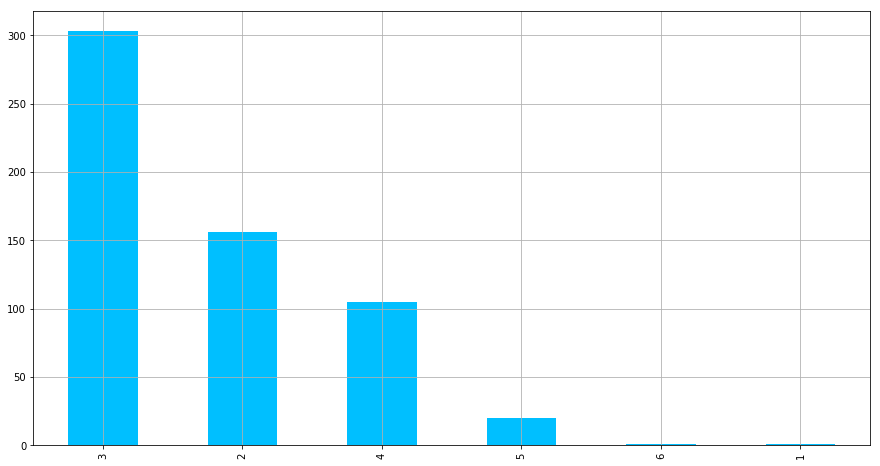

In [63]:
plt.figure(figsize=(15,8))
yes['AvgAge'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

### Customer main type 

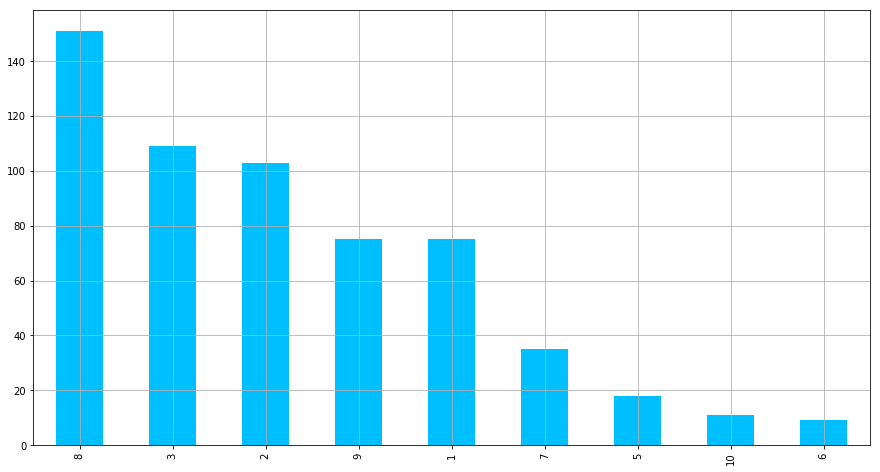

In [64]:
plt.figure(figsize=(15,8))
yes['CustomerMainType'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

# Model Training 

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [66]:
train = df[df.ORIGIN == 'train'].copy()
test = df[df.ORIGIN == 'test'].copy()

In [67]:
Train_Y = train.CARAVAN
Train_X = train.drop(['CARAVAN','ORIGIN'], axis=1)


In [68]:
Test_Y = test.CARAVAN
Test_X = test.drop(['CARAVAN','ORIGIN'], axis=1)


## KNN

In [69]:
from sklearn import neighbors
print("Nearest Neighbors Dataframe Test score :")
clf = neighbors.KNeighborsClassifier(3,'distance')
clf.fit(X=Train_X,y=Train_Y)
clf.score(Test_X,Test_Y)

Nearest Neighbors Dataframe Test score :


0.92275

In [70]:
KNN_y_pred_class = clf.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, KNN_y_pred_class)

array([[3667,   95],
       [ 214,   24]])

In [71]:
from sklearn.metrics import classification_report
print(classification_report(Test_Y, KNN_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3762
           1       0.20      0.10      0.13       238

   micro avg       0.92      0.92      0.92      4000
   macro avg       0.57      0.54      0.55      4000
weighted avg       0.90      0.92      0.91      4000



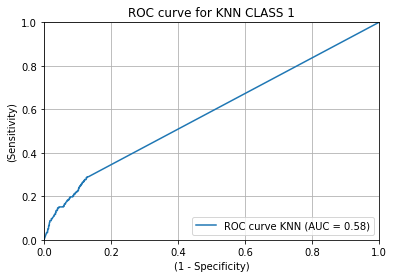

In [72]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = clf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### SVM


In [73]:
from sklearn.svm import SVC
clf_S = SVC(kernel='rbf',probability=True,random_state=0, gamma=.01, C=100000)
clf_S.fit(Train_X, Train_Y) 
print("SVM Dataframe Test score :")
print(clf_S.score(Test_X,Test_Y))

SVM Dataframe Test score :
0.8995


In [74]:
SVM_y_pred_class = clf_S.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, SVM_y_pred_class)

array([[3570,  192],
       [ 210,   28]])

In [75]:
from sklearn.metrics import classification_report
report = classification_report(Test_Y,SVM_y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3762
           1       0.13      0.12      0.12       238

   micro avg       0.90      0.90      0.90      4000
   macro avg       0.54      0.53      0.53      4000
weighted avg       0.90      0.90      0.90      4000



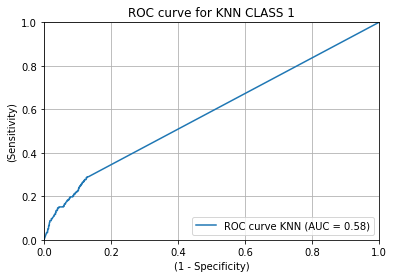

In [76]:
from sklearn.metrics import roc_curve, auc
svm_pred_prob = clf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

**Neural Network**

In [77]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,max_iter=10)
ppn.fit(Train_X, Train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=10, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
ppn_y_pred_class = ppn.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, ppn_y_pred_class)

array([[3761,    1],
       [ 237,    1]])

In [79]:
print("Neural network Dataframe Test score :")
print(ppn.score(Test_X,Test_Y))

Neural network Dataframe Test score :
0.9405


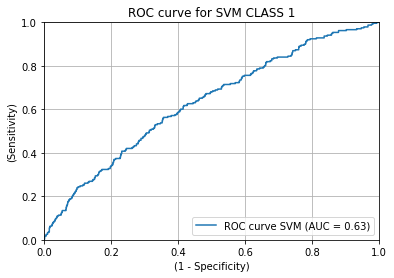

In [80]:
from sklearn.metrics import roc_curve, auc
ppn_pred_prob = clf_S.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, ppn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

**Naives Bayesian Classifier**

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(Train_X, Train_Y)
y_pred = gnb.predict(Test_X)
print(gnb.score(Test_X,Test_Y))
class_names=np.unique(np.array(Test_Y))
confusion_matrix(Test_Y,y_pred)

0.187


array([[ 523, 3239],
       [  13,  225]])

In [82]:
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.14      0.24      3762
           1       0.06      0.95      0.12       238

   micro avg       0.19      0.19      0.19      4000
   macro avg       0.52      0.54      0.18      4000
weighted avg       0.92      0.19      0.24      4000



In [83]:
from sklearn.metrics import classification_report
report = classification_report(Test_Y,ppn_y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.50      0.00      0.01       238

   micro avg       0.94      0.94      0.94      4000
   macro avg       0.72      0.50      0.49      4000
weighted avg       0.91      0.94      0.91      4000



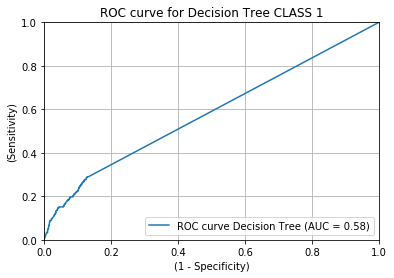

In [84]:
from sklearn.metrics import roc_curve, auc
gnb_pred_prob = clf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, gnb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for naives Bayesian Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### Decision Tree


In [85]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(Train_X, Train_Y) 
print(clf_tree.score(Test_X,Test_Y))

0.8915


In [86]:
tree_y_pred_class = clf_tree.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, tree_y_pred_class)

array([[3534,  228],
       [ 206,   32]])

In [87]:
print(classification_report(Test_Y, KNN_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3762
           1       0.20      0.10      0.13       238

   micro avg       0.92      0.92      0.92      4000
   macro avg       0.57      0.54      0.55      4000
weighted avg       0.90      0.92      0.91      4000



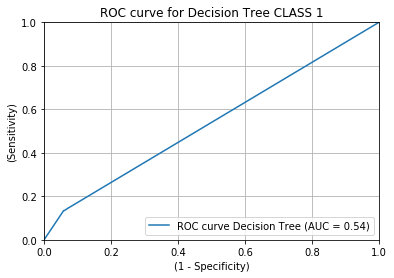

In [88]:
from sklearn.metrics import roc_curve, auc
tree_pred_prob = clf_tree.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, tree_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [111]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
fi = rf_feat_importance(rf, Train_X); fi[:10]

,cols,imp
46,PPERSAUT,0.122270
67,APERSAUT,0.115234
81,APLEZIER,0.102057
58,PBRAND,0.085996
43,PWAPART,0.053027
41,MINKGEM,0.046233
0,MOSTYPE,0.044058
60,PPLEZIER,0.038988
42,MKOOPKLA,0.038683
17,MOPLLAAG,0.033829


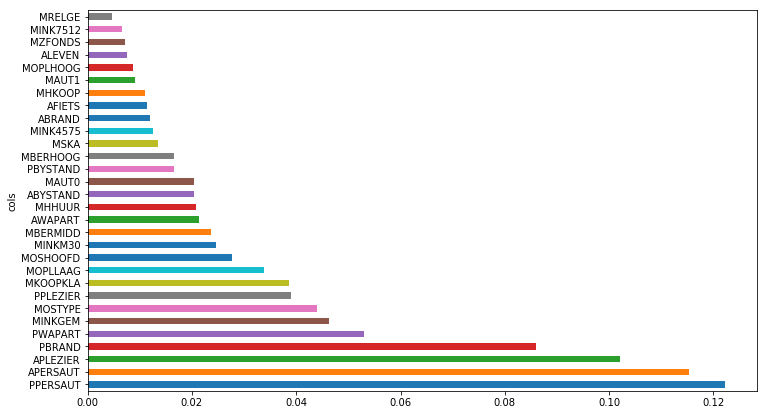

In [112]:
plot_fi(fi[:30]);

## Comparing the models 

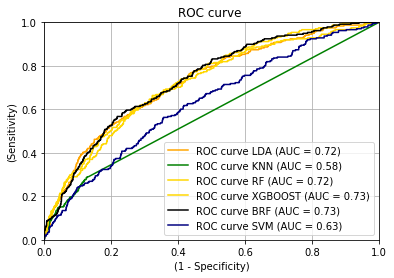

In [106]:
fpr6, tpr6, thresholds6 = roc_curve(Test_Y, gnb_pred_prob)
roc_auc6 = auc(fpr6, tpr6)

fpr5, tpr5, thresholds5 = roc_curve(Test_Y, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)



fpr3, tpr3, thresholds3 = roc_curve(Test_Y, ppn_pred_prob)
roc_auc3 = auc(fpr3, tpr3)

fpr2, tpr2, thresholds2 = roc_curve(Test_Y, tree_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

fpr1, tpr1, thresholds1 = roc_curve(Test_Y,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.plot(fpr6, tpr6,color='orange',label='ROC curve navies (AUC = %0.2f)' % roc_auc6)
plt.plot(fpr5, tpr5,color='green',label='ROC curve KNN (AUC = %0.2f)' % roc_auc5)

plt.plot(fpr3, tpr3,color='gold',label='ROC curve neural (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr2, tpr2,color='black',label='ROC curve decision tree (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr1, tpr1,color='navy',label='ROC curve SVM (AUC = %0.2f)' % roc_auc1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

The curves for each model are thus indicative of relative predictive power of each model. For instance, BRF model has higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability as compared to RP and SVM models.  xgboost is close .


# Scoring:
Balanced Random Forest seems to offer the best results with an AUC of 0.73 , we will use this model for our scoring

In [107]:
test_target = Test_Y.copy()
test_target.reset_index(drop=True, inplace=True)
test_target=test_target.replace({
    1:'Yes',
    0:'No'
})
predicted_target=brf.predict(Test_X)
predicted_target=pd.Series(predicted_target).replace({
    1:'Yes',
    0:'No'
})

In [108]:
ranks=pd.DataFrame(data={
    'realClass':test_target,
    'predictedClass':predicted_target,
    'rank':brf_pred_prob
})
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,realClass,predictedClass,rank
2164,Yes,Yes,0.934833
595,Yes,Yes,0.933455
3871,No,Yes,0.930000
2118,Yes,Yes,0.928525
706,No,Yes,0.928525


In [109]:
top = ranks.where(ranks['rank']>0.5,).dropna()
top.head()

,realClass,predictedClass,rank
2164,Yes,Yes,0.934833
595,Yes,Yes,0.933455
3871,No,Yes,0.930000
2118,Yes,Yes,0.928525
706,No,Yes,0.928525


In [110]:
top.shape

(1284, 3)

# Conclusion


Our modeling process has provided some useful insights about the target market. In particular, it can be safely concluded that the target market is probably not a single group. There are at least two main customer profiles who are likely to own caravans and therefore are potential buyers of Caravan Insurance. For marketing purposes, each group would probably need to be approached in different ways, both in terms of the communication message as well as the medium of communication.
We identified 1307 customer who have higher probability of answering our mails ( Please note that in the original competition we didn't have the real class of the test set and so we built a mailing strategy accordingly )

<br>